# KNMI klimatologische data

In [170]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)
# Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van dagwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/gehomogeniseerde-reeks-maandtemperaturen-de-bilt> of de Centraal Nederland Temperatuur <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.
# 
# 
# STN      LON(east)   LAT(north)     ALT(m)  NAME
# 391:         6.197       51.498      19.50  ARCEN
# 370:         5.377       51.451      22.60  EINDHOVEN
# 331:         4.193       51.480       0.00  THOLEN
# 315:         3.998       51.447       0.00  HANSWEERT
# 324:         4.006       51.596       0.00  STAVENISSE
# 375:         5.707       51.659      22.00  VOLKEL
# 380:         5.762       50.906     114.30  MAASTRICHT
# 240:         4.790       52.318      -3.30  SCHIPHOL
# 286:         7.150       53.196      -0.20  NIEUW BEERTA
# 310:         3.596       51.442       8.00  VLISSINGEN
# 283:         6.657       52.069      29.10  HUPSEL
# 280:         6.585       53.125       5.20  EELDE
# 273:         5.888       52.703      -3.30  MARKNESSE
# 323:         3.884       51.527       1.40  WILHELMINADORP
# 249:         4.979       52.644      -2.40  BERKHOUT
# 377:         5.763       51.198      30.00  ELL
# 316:         3.694       51.657       0.00  SCHAAR
# 313:         3.242       51.505       0.00  VLAKTE V.D. RAAN
# 277:         6.200       53.413       2.90  LAUWERSOOG
# 348:         4.926       51.970      -0.70  CABAUW
# 308:         3.379       51.381       0.00  CADZAND
# 319:         3.861       51.226       1.70  WESTDORPE
# 215:         4.437       52.141      -1.10  VOORSCHOTEN
# 278:         6.259       52.435       3.60  HEINO
# 285:         6.399       53.575       0.00  HUIBERTGAT
# 343:         4.313       51.893       3.50  R'DAM-GEULHAVEN
# 225:         4.555       52.463       4.40  IJMUIDEN
# 330:         4.122       51.992      11.90  HOEK VAN HOLLAND
# 267:         5.384       52.898      -1.30  STAVOREN
# 269:         5.520       52.458      -3.70  LELYSTAD
# 344:         4.447       51.962      -4.30  ROTTERDAM
# 275:         5.873       52.056      48.20  DEELEN
# 235:         4.781       52.928       1.20  DE KOOY
# 257:         4.603       52.506       8.50  WIJK AAN ZEE
# 290:         6.891       52.274      34.80  TWENTHE
# 350:         4.936       51.566      14.90  GILZE-RIJEN
# 251:         5.346       53.392       0.70  HOORN (TERSCHELLING)
# 210:         4.430       52.171      -0.20  VALKENBURG
# 248:         5.174       52.634       0.80  WIJDENES
# 279:         6.574       52.750      15.80  HOOGEVEEN
# 258:         5.401       52.649       7.30  HOUTRIBDIJK
# 356:         5.146       51.859       0.70  HERWIJNEN
# 209:         4.518       52.465       0.00  IJMOND
# 265:         5.274       52.130      13.90  SOESTERBERG
# 312:         3.622       51.768       0.00  OOSTERSCHELDE
# 340:         4.342       51.449      19.20  WOENSDRECHT
# 260:         5.180       52.100       1.90  DE BILT
# 270:         5.752       53.224       1.20  LEEUWARDEN
# 311:         3.672       51.379       0.00  HOOFDPLAAT
# 242:         4.921       53.241      10.80  VLIELAND
# 
# YYYYMMDD = Date (YYYY=year MM=month DD=day); 
# DDVEC    = Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable); 
# FHVEC    = Vector mean windspeed (in 0.1 m/s); 
# FG       = Daily mean windspeed (in 0.1 m/s); 
# FHX      = Maximum hourly mean windspeed (in 0.1 m/s); 
# FHXH     = Hourly division in which FHX was measured; 
# FHN      = Minimum hourly mean windspeed (in 0.1 m/s); 
# FHNH     = Hourly division in which FHN was measured; 
# FXX      = Maximum wind gust (in 0.1 m/s); 
# FXXH     = Hourly division in which FXX was measured; 
# TG       = Daily mean temperature in (0.1 degrees Celsius); 
# TN       = Minimum temperature (in 0.1 degrees Celsius); 
# TNH      = Hourly division in which TN was measured; 
# TX       = Maximum temperature (in 0.1 degrees Celsius); 
# TXH      = Hourly division in which TX was measured; 
# T10N     = Minimum temperature at 10 cm above surface (in 0.1 degrees Celsius); 
# T10NH    = 6-hourly division in which T10N was measured; 6=0-6 UT, 12=6-12 UT, 18=12-18 UT, 24=18-24 UT
# SQ       = Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour); 
# SP       = Percentage of maximum potential sunshine duration; 
# Q        = Global radiation (in J/cm2); 
# DR       = Precipitation duration (in 0.1 hour); 
# RH       = Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm); 
# RHX      = Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm); 
# RHXH     = Hourly division in which RHX was measured; 
# EV24     = Potential evapotranspiration (Makkink) (in 0.1 mm); 
# PG       = Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values; 
# PX       = Maximum hourly sea level pressure (in 0.1 hPa); 
# PXH      = Hourly division in which PX was measured; 
# PN       = Minimum hourly sea level pressure (in 0.1 hPa); 
# PNH      = Hourly division in which PN was measured; 
# VVN      = Minimum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
# VVNH     = Hourly division in which VVN was measured; 
# VVX      = Maximum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
# VVXH     = Hourly division in which VVX was measured; 
# NG       = Mean daily cloud cover (in octants, 9=sky invisible); 
# UG       = Daily mean relative atmospheric humidity (in percents); 
# UX       = Maximum relative atmospheric humidity (in percents); 
# UXH      = Hourly division in which UX was measured; 
# UN       = Minimum relative atmospheric humidity (in percents); 
# UNH      = Hourly division in which UN was measured; 
# 
# STN,YYYYMMDD,DDVEC,FHVEC,   FG,  FHX, FHXH,  FHN, FHNH,  FXX, FXXH,   TG,   TN,  TNH,   TX,  TXH, T10N,T10NH,   SQ,   SP,    Q,   DR,   RH,  RHX, RHXH, EV24,   PG,   PX,  PXH,   PN,  PNH,  VVN, VVNH,  VVX, VVXH,   NG,   UG,   UX,  UXH,   UN,  UNH
# 

# column_names = ["STN","YYYYMMDD","DDVEC","FHVEC","FG","FHX","FHXH","FHN","FHNH","FXX","FXXH","TG","TN","TNH","TX","TXH","T10N","T10NH","SQ","SP","Q","DR","RH","RHX","RHXH","EV24","PG","PX","PXH","PN","PNH","VVN","VVNH","VVX","VVXH","NG","UG","UX","UXH","UN","UNH"]
                

In [144]:
stations = {
    260:'De Bilt',
    279:'Hoogeveen',
}

columns = ["STN","YYYYMMDD","TG","TN","TNH","TX","TXH","T10N","T10NH"]

parameters = {'start':'20180101',
              'end':'20181231',
              'vars':':'.join(columns[2:]),
              'stns':':'.join(map(str, stations.keys()))
             }

# url_template = "https://projects.knmi.nl/klimatologie/uurgegevens/getdata_uur.cgi?start={start}&end={end}"
url_template = "https://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi?start={start}&end={end}&vars={vars}&stns={stns}"

url = url_template.format(**parameters)

print(url)

https://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi?start=20180101&end=20181231&vars=TG:TN:TNH:TX:TXH:T10N:T10NH&stns=260:279


In [153]:
df = pd.read_csv(url, encoding='utf-8', comment='#', header=None, names=columns)
converted = False

df.head()

,STN,YYYYMMDD,TG,TN,TNH,TX,TXH,T10N,T10NH
0,260,20180101,68,52,24,88,1,46,24
1,260,20180102,65,45,2,91,24,32,6
2,260,20180103,88,54,7,112,3,52,12
3,260,20180104,82,68,14,107,17,62,6
4,260,20180105,64,44,18,87,15,18,18


In [154]:
print(df.shape)
print(df.dtypes)

(730, 9)
STN         int64
YYYYMMDD    int64
TG          int64
TN          int64
TNH         int64
TX          int64
TXH         int64
T10N        int64
T10NH       int64
dtype: object


In [158]:
if not converted:
    df['TG'] = 0.1 * df['TG']
    df['TN'] = 0.1 * df['TN']
    df['TX'] = 0.1 * df['TX']
    df['T10N'] = 0.1 * df['T10N']

    df['Date'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
    
    converted = True
    
df.head()

,STN,YYYYMMDD,TG,TN,TNH,TX,TXH,T10N,T10NH,Date
0,260,20180101,6.8,5.2,24,8.8,1,4.6,24,2018-01-01
1,260,20180102,6.5,4.5,2,9.1,24,3.2,6,2018-01-02
2,260,20180103,8.8,5.4,7,11.2,3,5.2,12,2018-01-03
3,260,20180104,8.2,6.8,14,10.7,17,6.2,6,2018-01-04
4,260,20180105,6.4,4.4,18,8.7,15,1.8,18,2018-01-05


In [172]:
df_TG = df[['STN','Date','TG','TN','TX','T10N']].set_index(['Date', 'STN']).unstack(level=1)
df_TG.rename(stations, axis=1, inplace=True)
df_TG.head()

TG                TN                TX              T10N  \
STN        De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen De Bilt   
Date                                                                       
2018-01-01     6.8       6.4     5.2       4.7     8.8       8.7     4.6   
2018-01-02     6.5       5.7     4.5       4.2     9.1       7.1     3.2   
2018-01-03     8.8       7.5     5.4       6.0    11.2       9.8     5.2   
2018-01-04     8.2       7.5     6.8       6.4    10.7       9.4     6.2   
2018-01-05     6.4       6.0     4.4       4.2     8.7       7.4     1.8   

                      
STN        Hoogeveen  
Date                  
2018-01-01       3.6  
2018-01-02       3.4  
2018-01-03       5.4  
2018-01-04       6.2  
2018-01-05       3.1

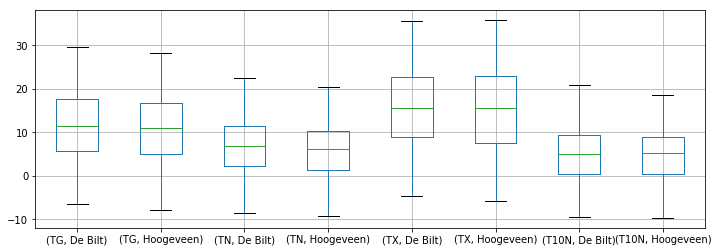

In [179]:
df_TG.boxplot(figsize=(12,4))

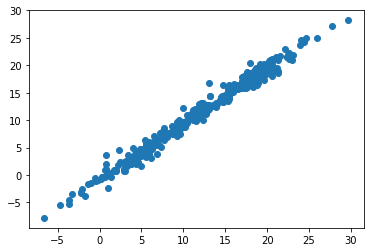

In [171]:
plt.scatter(df_TG[('TG','De Bilt')], df_TG[('TG','Hoogeveen')])

In [180]:
df_TG.describe()

TG                      TN                      TX              \
STN       De Bilt   Hoogeveen     De Bilt   Hoogeveen     De Bilt   Hoogeveen   
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    11.401644   10.783562    6.690959    5.984658   15.764384   15.464110   
std      6.933978    7.085231    5.945545    5.828128    8.143220    8.650189   
min     -6.600000   -7.800000   -8.500000   -9.300000   -4.600000   -5.700000   
25%      5.700000    5.000000    2.200000    1.400000    8.900000    7.600000   
50%     11.400000   11.000000    6.900000    6.100000   15.600000   15.500000   
75%     17.600000   16.700000   11.400000   10.400000   22.800000   22.900000   
max     29.700000   28.200000   22.400000   20.500000   35.700000   35.800000   

             T10N              
STN       De Bilt   Hoogeveen  
count  365.000000  365.000000  
mean     5.036164    4.730411  
std      6.016740    5.982633  
min     -9.400000   -9.700000  
25%      0.400000    0.400000  
50%      4.900000    5.200000  
75%      9.500000    8.900000  
max     20.900000   18.500000

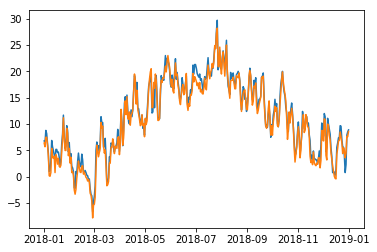

In [181]:
plt.plot(df_TG[('TG','De Bilt')])
plt.plot(df_TG[('TG','Hoogeveen')])
plt.show()

In [183]:
df_TG['diff'] = df_TG[('TG','De Bilt')] - df_TG[('TG','Hoogeveen')]
df_TG['diff'].describe()

count    365.000000
mean       0.618082
std        0.913423
min       -3.700000
25%        0.200000
50%        0.700000
75%        1.100000
max        3.400000
Name: diff, dtype: float64

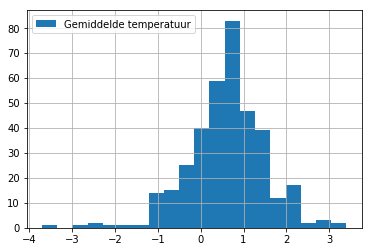

In [190]:
df_TG['diff'].hist(bins=20)
plt.legend(['Gemiddelde temperatuur'])